In [165]:
import pandas as pd
import os
import glob
import re

### Data Preprocessing

Create dictionary named vocab_er which has word as a key from imdb.vocab and corresponding estimated ratings earned from imdbEr.txt as a value

In [166]:
vocab_er = {}
vocab = []
er = []

In [167]:
with open('/Users/bradyhong/Downloads/aclImdb 2/imdb.vocab', 'r') as f:
    for i in f.readlines():
        vocab.append(i.strip())
with open('/Users/bradyhong/Downloads/aclImdb 2/imdbEr.txt', 'r') as a:
    for j in a.readlines():
        er.append(j.strip())

In [67]:
for l in range(len(vocab)):
    vocab_er[vocab[l]] = er[l]

In [68]:
train = pd.DataFrame()
test = pd.DataFrame()

In [69]:
def loopAllFiles(directory):
    # loop through all txt files in directory
    extension = 'txt'
    os.chdir(directory)
    result = glob.glob('*.{}'.format(extension))
    return result

In [70]:
review = []
rating = []
# fills out sentiment first half with 1 and second half with 0 
# since first 12500 data is positive reviews and last 12500 data is negative reviews
sentiment = [1 for num in range(12500)]
for i in range(12500):
    sentiment.append(0)

In [71]:
# Walks through the files and extract all the reviews and rating of the reviews
def walks_dirs(file_path):
    txt_file = loopAllFiles('/Users/bradyhong/Downloads/aclImdb 2/'+file_path)
    txt_file = (sorted(txt_file, key=lambda x: int(re.split('_|\.', x)[0])))
    for i in txt_file:
        rating.append(re.split('_|\.', i)[1])
        with open('/Users/bradyhong/Downloads/aclImdb 2/'+file_path+'/'+i, 'r') as f:
            review.append(f.read())

Fills out train and test pandas dataframe with review, sentiment, and Rating feature

In [72]:
walks_dirs('train/pos')
walks_dirs('train/neg')
train['Review'] = review
train['Sentiment'] = sentiment
train['Rating'] = rating

In [73]:
review = []
rating = []
walks_dirs('test/pos')
walks_dirs('test/neg')
test['Review'] = review
test['Sentiment'] = sentiment
test['Rating'] = rating

### Calculate the polarity score

Calculating the estimated polarity of each post by multiplying each word's polarity with frequency of the word for each word

In [ ]:
def calculate(train_or_test):
    file_path = '/Users/bradyhong/Downloads/aclImdb 2/'+train_or_test+'/labeledBow.feat'
    with open(file_path, 'r') as b:
        rate = []
        calculation = []
        for j in b.readlines():  
            cal = re.split(' |:|\n', j)
            rate.append(cal[0])
            cal = cal[1:]
            new_cal = 0
            for i in range(len(cal)):
                new_cal += float(vocab_er[vocab[int(cal[(i*2)])]]) * float(cal[(i*2)+1])
                if cal[(i*2)+2] == '':
                    calculation.append(new_cal)
                    break
    if train_or_test == 'train':
        train['calculation'] = calculation
    else:
        test['calculation'] = calculation

In [ ]:
calculate('train')
calculate('test')

### Highest 10 estimated rating word and Lowest 10 estimated rating polarity word

In [159]:
import operator 
top_10 = dict(sorted(vocab_er.items(), key = operator.itemgetter(1), reverse = True)[:10])
low_10 = dict(sorted(vocab_er.items(), key = operator.itemgetter(1))[:10])

In [160]:
top_10

{'xica': '4.5',
 'filone': '4.5',
 'bazza': '4.5',
 'alekos': '4.5',
 'riedelsheimer': '4.5',
 'citizenx': '4.5',
 'telemundo': '4.5',
 'machi': '4.5',
 'englebert': '4.5',
 'horstachio': '4.5'}

In [161]:
low_10

{'side-effects': '-0.00011528953742',
 'cleared': '-0.000127990731132',
 'sprang': '-0.000131026317304',
 'found': '-0.000144238307082',
 'upgrade': '-0.000227547963041',
 'notice': '-0.000266495726775',
 'frantically': '-0.000295770477084',
 'disembodied': '-0.000304782306461',
 'legion': '-0.000332890295048',
 'copy': '-0.000340251143812'}

### EDA of Rating of the movie review

In [74]:
int_rating = train['Rating'].astype(int)

In [140]:
pd.DataFrame(int_rating.describe())

,Rating
count,25000.000000
mean,5.477720
std,3.466477
min,1.000000
25%,2.000000
50%,5.500000
75%,9.000000
max,10.000000


In [141]:
pd.DataFrame(test['Rating'].astype(int).describe())

,Rating
count,25000.000000
mean,5.512960
std,3.490902
min,1.000000
25%,2.000000
50%,5.500000
75%,9.000000
max,10.000000


In [117]:
train_count = list(int_rating.value_counts().sort_index(ascending=True))

In [118]:
test_count = list(test['Rating'].astype(int).value_counts().sort_index(ascending=True))

In [152]:
total_count = []
for i in range(8):
    total_count.append(train_count[i]+test_count[i])

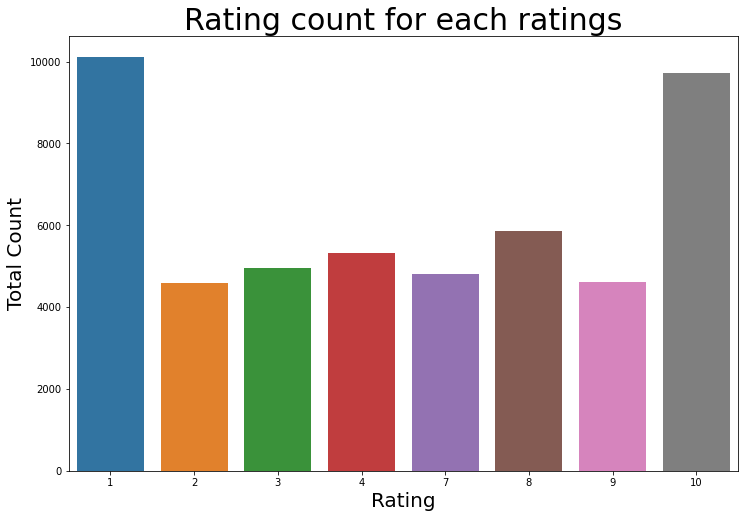

In [139]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.barplot(x=[1,2,3,4,7,8,9,10], y=total_count)
plt.title('Rating count for each ratings',fontsize = 30)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Total Count', fontsize=20)
plt.show()

### Choose train and test values to run the model

In [35]:
X_train = train.drop(['Rating', 'Sentiment', 'Review'], axis=1)

In [36]:
y_train = train['Sentiment']

In [37]:
X_test = test.drop(['Rating', 'Sentiment', 'Review'], axis=1)

In [38]:
y_test = test['Sentiment']

### Predict the outcome by using Support Vector Machine

In [45]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [46]:
from sklearn import metrics  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.83676
